In [2]:
import healpy as hp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.image import pil_to_array


In [4]:
img=Image.open(r"/mnt/c/Users/Kartik/Downloads/shadedrelief.jpg").convert('L')

In [8]:
img_array=pil_to_array(img) # converting the image to numoy array
img_array.shape

(5400, 10800)

In [9]:
theta = np.linspace(0, np.pi,img_array.shape[0])[:, None]   #[:, None] adds a axis of lenght 1
phi = np.linspace(-np.pi, np.pi,img_array.shape[1])


In [13]:
nside = 512
print( "Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))

Pixel area: 0.01 square degrees


In [23]:
pix = hp.ang2pix(nside, theta, phi,)   #angular coordinates to hilpix pixel number


In [24]:
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)   #creating empty numpy array

In [25]:
healpix_map[pix] = img_array

/home/kartik/.local/lib/python3.6/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds


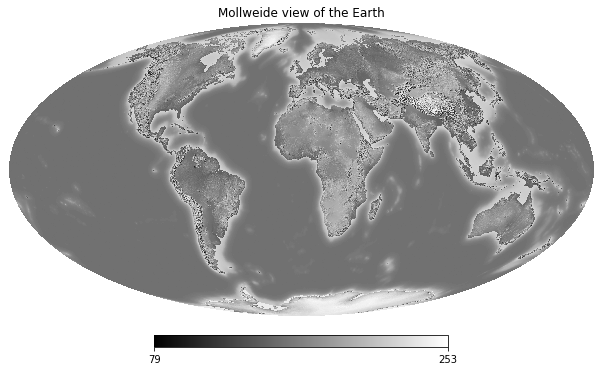

In [26]:
hp.mollview(healpix_map, cmap="gray", xsize=5000, flip="geo",title="Mollweide view of the Earth")

In [16]:
hp.fitsfunc.write_map('uniform sky.fits',healpix_map)


OSError: File 'uniform sky.fits' already exists.